<a href="https://www.kaggle.com/code/istiyaque6ty3/best-employers?scriptVersionId=115158224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #...
import math
myplate=sns.color_palette("Paired")
sns.set(style='white', palette=myplate)

import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
def bar_colorizer(n,*h1):
    colors=[]
    for i in range(n):
        if i+1 not in h1:
            colors.append('#ADD8E6')
        else:
            colors.append('#0D2241')
    return colors

print('^^Importing Important Stuff^^')

/kaggle/input/worlds-best-employers-top-100/Worlds Best Employers.csv
^^Importing Important Stuff^^


# Loading the Dataset

In [2]:
employer_path = "/kaggle/input/worlds-best-employers-top-100/Worlds Best Employers.csv"
emp = pd.read_csv(employer_path, index_col = 'RANK')
emp["EMPLOYEES"] = emp["EMPLOYEES"].str.replace(',', '').astype(int)
emp.head()

,NAME,INDUSTRIES,COUNTRY/TERRITORY,EMPLOYEES
RANK,,,,
1.0,Samsung Electronics,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673
2.0,Microsoft,"IT, Internet, Software & Services",United States,221000
3.0,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000
4.0,Alphabet,"IT, Internet, Software & Services",United States,156500
5.0,Apple,"Semiconductors, Electronics, Electrical Engine...",United States,154000


Checking for missing values

In [3]:
emp.isnull().sum()

NAME                 0
INDUSTRIES           0
COUNTRY/TERRITORY    0
EMPLOYEES            0
dtype: int64

No missing values were found

# Large Employee Numbers

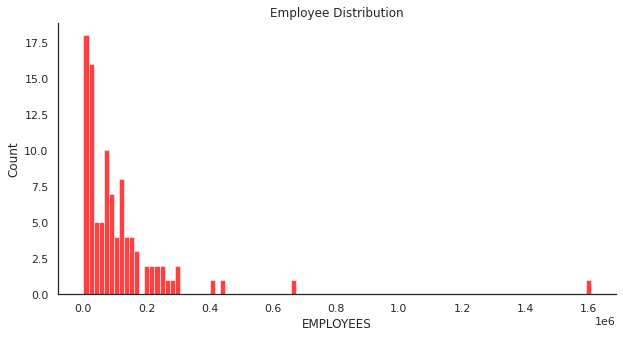

In [4]:
plt.figure(figsize = (10,5))
sns.histplot(emp["EMPLOYEES"],color = "Red", bins = 100)
plt.title("Employee Distribution")
sns.despine()

# European Countries as Best Employers

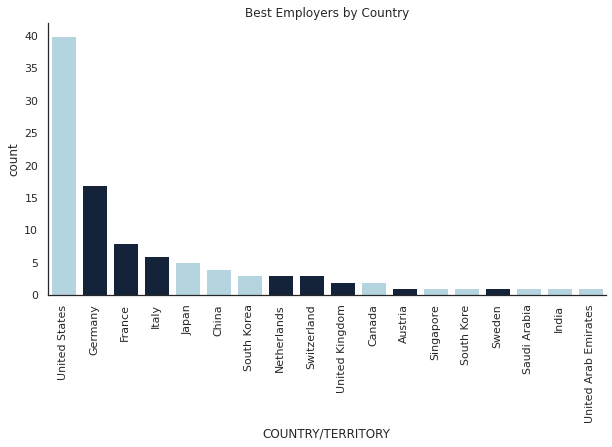

In [5]:
plt.figure(figsize = (10,5))
sns.countplot(emp['COUNTRY/TERRITORY'],order= emp['COUNTRY/TERRITORY'].value_counts().index, palette=bar_colorizer(18,2,3,4,8,9,10,12,15))
plt.title("Best Employers by Country")
plt.xticks(rotation = 90)
sns.despine()

# Tech Industries at the Top

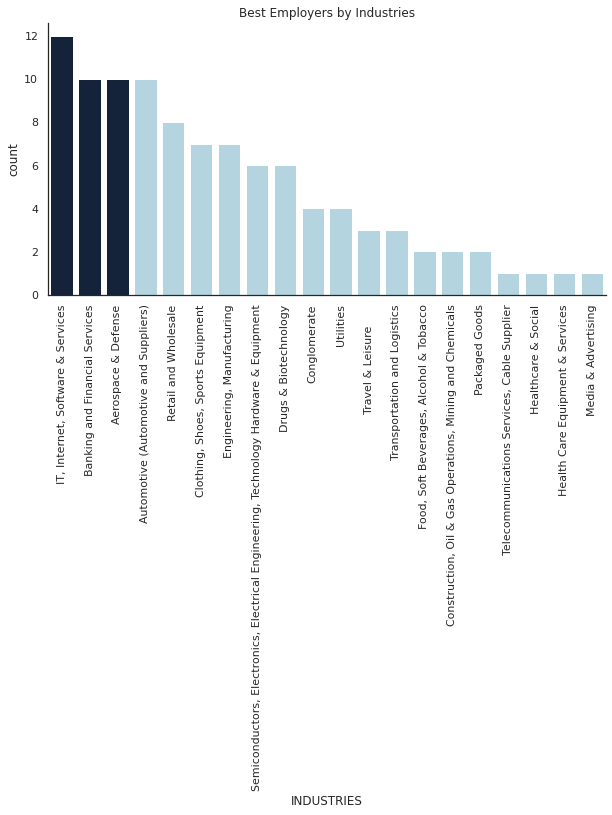

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(emp['INDUSTRIES'],order= emp['INDUSTRIES'].value_counts().index, palette = bar_colorizer(33,1,2,3))
plt.title("Best Employers by Industries")
plt.xticks(rotation = 90)
sns.despine()

# Top 3 industries dominated by the US

In [7]:
top_country = emp["COUNTRY/TERRITORY"].value_counts()[:3].index

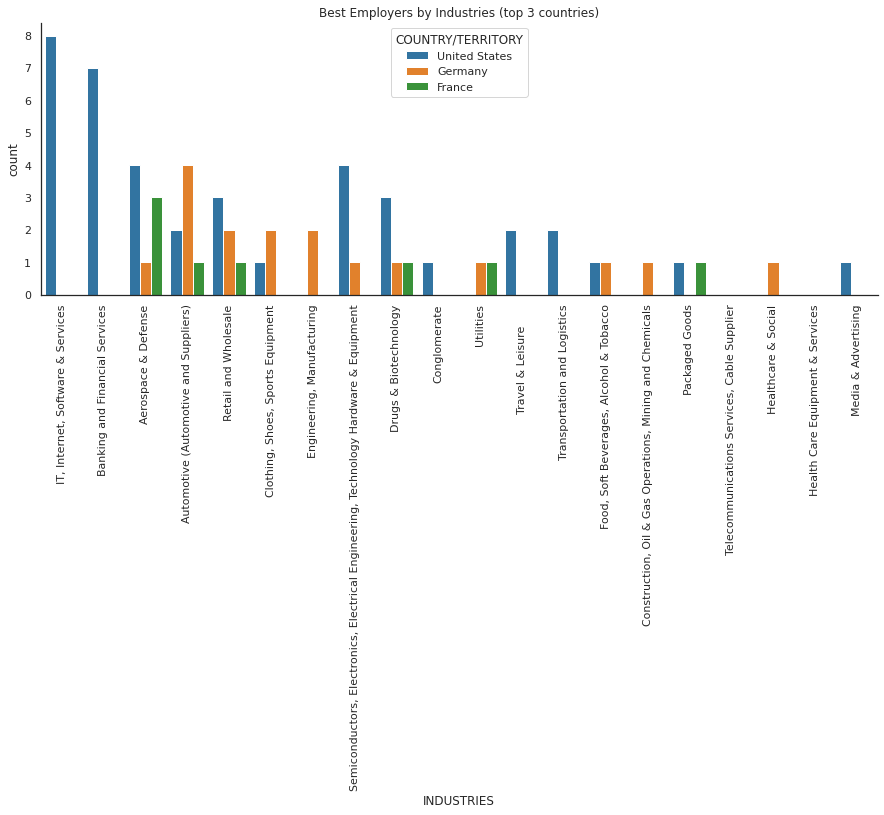

In [8]:
plt.figure(figsize = (15,5))
sns.countplot(data = emp[emp["COUNTRY/TERRITORY"].isin(top_country)], x ='INDUSTRIES',order= emp['INDUSTRIES'].value_counts().index, hue = 'COUNTRY/TERRITORY', palette = 'tab10')
plt.title("Best Employers by Industries (top 3 countries)")
plt.xticks(rotation = 90)
sns.despine()